# Student Performance Factors Using Machine Learning

## Data Preparation

### Load datasets

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
# Load datasets
mat_df = pd.read_csv('../data/raw/student-mat.csv', sep=';')
por_df = pd.read_csv('../data/raw/student-por.csv', sep=';')

In [3]:
# Display dataset information
print("Student-Math Dataset:")
print(mat_df.info())
print("\nStudent-Portuguese Dataset:")
print(por_df.info())

Student-Math Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    

### Merge datasets

In [4]:
# Key columns for identifying identical students - from student.txt and student-merge.R files
id_columns = [
    "school", "sex", "age", "address", "famsize", "Pstatus",
    "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"
]

# Merge datasets - keeping only students who show up in both datasets
merged_df = pd.merge(mat_df, por_df, on=id_columns, suffixes=('_mat', '_por'))

# Display merged dataset information
print("\nMerged Dataset:")
print(merged_df.info())
print(f"Shape: {merged_df.shape}")
print(merged_df.head())

# Save merged dataframe as CSV file
merged_df.to_csv('../data/processed/student-merged.csv', index=True)


Merged Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   school          382 non-null    object
 1   sex             382 non-null    object
 2   age             382 non-null    int64 
 3   address         382 non-null    object
 4   famsize         382 non-null    object
 5   Pstatus         382 non-null    object
 6   Medu            382 non-null    int64 
 7   Fedu            382 non-null    int64 
 8   Mjob            382 non-null    object
 9   Fjob            382 non-null    object
 10  reason          382 non-null    object
 11  guardian_mat    382 non-null    object
 12  traveltime_mat  382 non-null    int64 
 13  studytime_mat   382 non-null    int64 
 14  failures_mat    382 non-null    int64 
 15  schoolsup_mat   382 non-null    object
 16  famsup_mat      382 non-null    object
 17  paid_mat        382 non-null    objec

### Combine columns

In [5]:
# Create average columns for numeric columns (not used to merge datasets)
# Numeric columns to combine
numeric_columns = ['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

# Loop through the list of numeric columns
for col in numeric_columns:
    # Create the average column - rounded up interger value
    merged_df[f'{col}_avg'] = merged_df[[f'{col}_mat', f'{col}_por']].mean(axis=1).round().astype(int)
    
    # Drop the original columns
    merged_df.drop([f'{col}_mat', f'{col}_por'], axis=1, inplace=True)

In [6]:
# Create acombined columns for categorial columns (not used to merge datasets)
# Categorical columns to combine
categorical_columns = ['guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'romantic']

for col in categorical_columns:
    # Create the combined column by checking if the values are the same - if not return Unknown
    merged_df[f'{col}_combined'] = merged_df.apply(
        lambda row: row[f'{col}_mat'] if row[f'{col}_mat'] == row[f'{col}_por'] else 'Unknown', axis=1
    )
    # Drop the original columns
    merged_df.drop([f'{col}_mat', f'{col}_por'], axis=1, inplace=True)

In [7]:
# Display the updated DataFrame with combined columns
print("Merged Dataset (with combined columns):")
print(merged_df.info())
print(f"Shape: {merged_df.shape}")
print(merged_df.head())

Merged Dataset (with combined columns):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   school               382 non-null    object
 1   sex                  382 non-null    object
 2   age                  382 non-null    int64 
 3   address              382 non-null    object
 4   famsize              382 non-null    object
 5   Pstatus              382 non-null    object
 6   Medu                 382 non-null    int64 
 7   Fedu                 382 non-null    int64 
 8   Mjob                 382 non-null    object
 9   Fjob                 382 non-null    object
 10  reason               382 non-null    object
 11  nursery              382 non-null    object
 12  internet             382 non-null    object
 13  G1_mat               382 non-null    int64 
 14  G2_mat               382 non-null    int64 
 15  G3_mat           

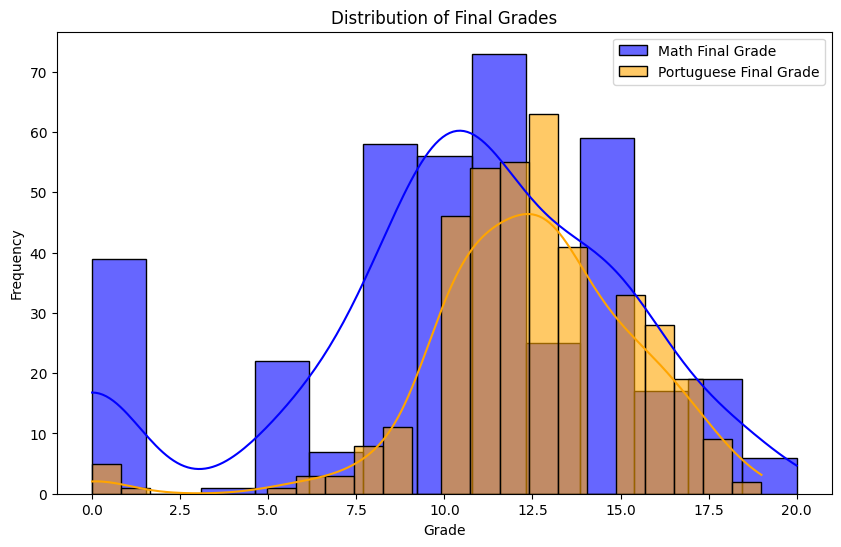

<Figure size 640x480 with 0 Axes>

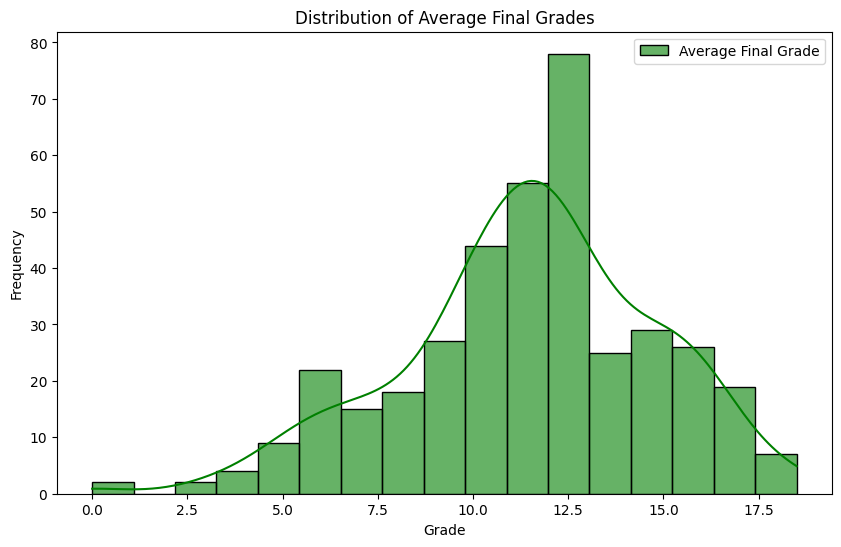

<Figure size 640x480 with 0 Axes>

In [8]:
# Average G1, G2 and G3 results for mat and por
merged_df['G1_avg'] = merged_df[['G1_mat', 'G1_por']].mean(axis=1)
merged_df['G2_avg'] = merged_df[['G2_mat', 'G2_por']].mean(axis=1)
merged_df['G3_avg'] = merged_df[['G3_mat', 'G3_por']].mean(axis=1)

# Visualize distributions of G3_mat, G3_por
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['G3_mat'], kde=True, color='blue', label='Math Final Grade', alpha=0.6)
sns.histplot(merged_df['G3_por'], kde=True, color='orange', label='Portuguese Final Grade', alpha=0.6)
plt.title("Distribution of Final Grades")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.legend()
plt.show()
plt.savefig('../visualisations/G3_mat_por_distribution.png', format='png')

# Visualize distributions of G3_avg
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['G3_avg'], kde=True, color='green', label='Average Final Grade', alpha=0.6)
plt.title("Distribution of Average Final Grades")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.legend()
plt.show()
plt.savefig('../visualisations/G3_avg_distribution.png', format='png')

In [9]:
# Drop G1, G2, G3 results for individual subjects
merged_df.drop(['G1_mat', 'G2_mat', 'G3_mat', 'G1_por', 'G2_por', 'G3_por'], axis=1, inplace=True)

# Display merged dataset with combined columns
print("Combined Dataset:")
print(merged_df.info())
print(f"Shape: {merged_df.shape}")
print(merged_df.head())

# Save combined dataframe as CSV file
merged_df.to_csv('../data/processed/student-combined.csv', index=True)

Combined Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               382 non-null    object 
 1   sex                  382 non-null    object 
 2   age                  382 non-null    int64  
 3   address              382 non-null    object 
 4   famsize              382 non-null    object 
 5   Pstatus              382 non-null    object 
 6   Medu                 382 non-null    int64  
 7   Fedu                 382 non-null    int64  
 8   Mjob                 382 non-null    object 
 9   Fjob                 382 non-null    object 
 10  reason               382 non-null    object 
 11  nursery              382 non-null    object 
 12  internet             382 non-null    object 
 13  traveltime_avg       382 non-null    int64  
 14  studytime_avg        382 non-null    int64  
 15  failures_avg         3

## Data Exploration

In [10]:
# Display statistics for combined dataset
print("Descriptive Statistics (Combined Dataset):")
print(merged_df.describe())
# Check for missing values
print("\nMissing Values (Combined Dataset):")
print(merged_df.isnull().sum().sort_values(ascending=False))

Descriptive Statistics (Combined Dataset):
              age        Medu        Fedu  traveltime_avg  studytime_avg  \
count  382.000000  382.000000  382.000000      382.000000     382.000000   
mean    16.586387    2.806283    2.565445        1.447644       2.036649   
std      1.173470    1.086381    1.096240        0.695793       0.837893   
min     15.000000    0.000000    0.000000        1.000000       1.000000   
25%     16.000000    2.000000    2.000000        1.000000       1.000000   
50%     17.000000    3.000000    3.000000        1.000000       2.000000   
75%     17.000000    4.000000    4.000000        2.000000       2.000000   
max     22.000000    4.000000    4.000000        4.000000       4.000000   

       failures_avg  famrel_avg  freetime_avg   goout_avg    Dalc_avg  \
count    382.000000  382.000000    382.000000  382.000000  382.000000   
mean       0.201571    3.937173      3.219895    3.112565    1.481675   
std        0.582958    0.905643      0.984831    1.11

### Key Feature Correlations

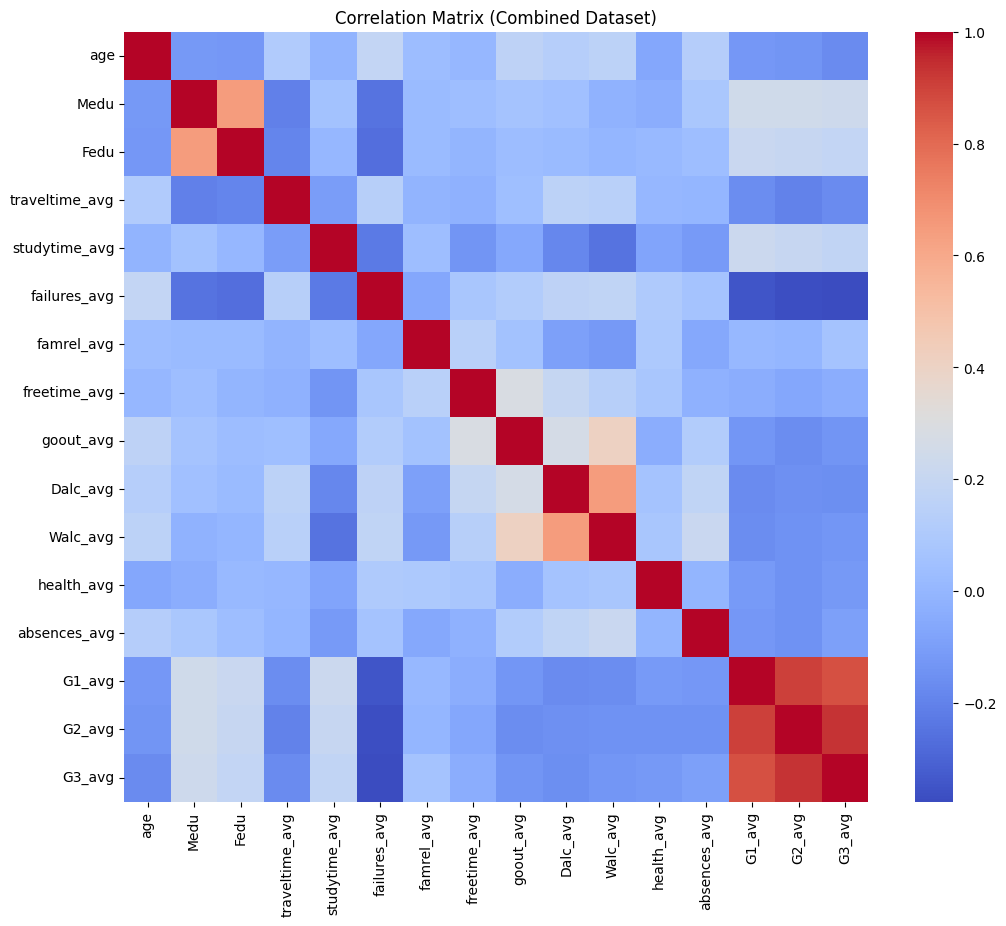

<Figure size 640x480 with 0 Axes>

In [11]:
# Filter for numeric columns
numeric_columns = merged_df.select_dtypes(include=['number']).columns

# Plot the correlation matrix for the filtered numeric columns
plt.figure(figsize=(12, 10))
sns.heatmap(merged_df[numeric_columns].corr(), annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix (Combined Dataset)")
plt.show()
plt.savefig('../visualisations/correlation_matrix.png', format='png')

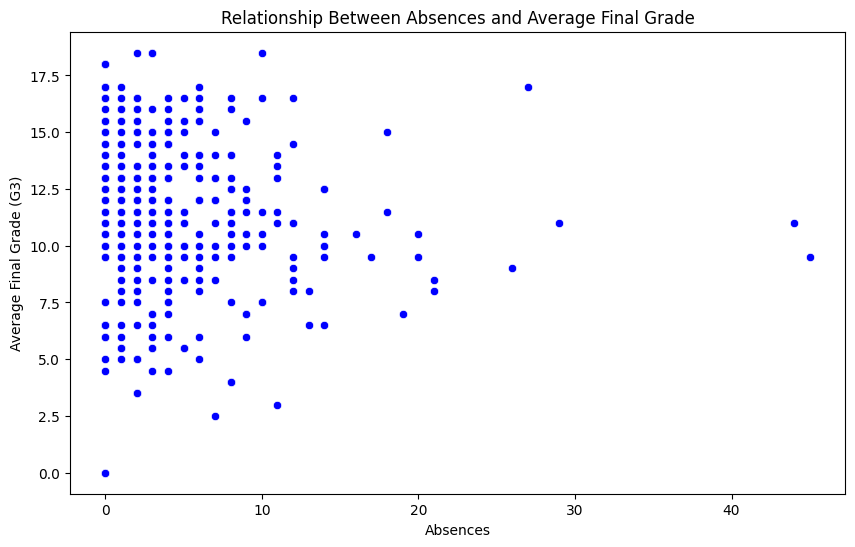

<Figure size 640x480 with 0 Axes>

In [12]:
# Relationship between average G3 grades and absences
plt.figure(figsize=(10, 6))
sns.scatterplot(x='absences_avg', y='G3_avg', data=merged_df, color='blue')
plt.title("Relationship Between Absences and Average Final Grade")
plt.xlabel("Absences")
plt.ylabel("Average Final Grade (G3)")
plt.show()
plt.savefig('../visualisations/G3_avg_absence_scatter.png', format='png')

## Modelling

### Feature Selection

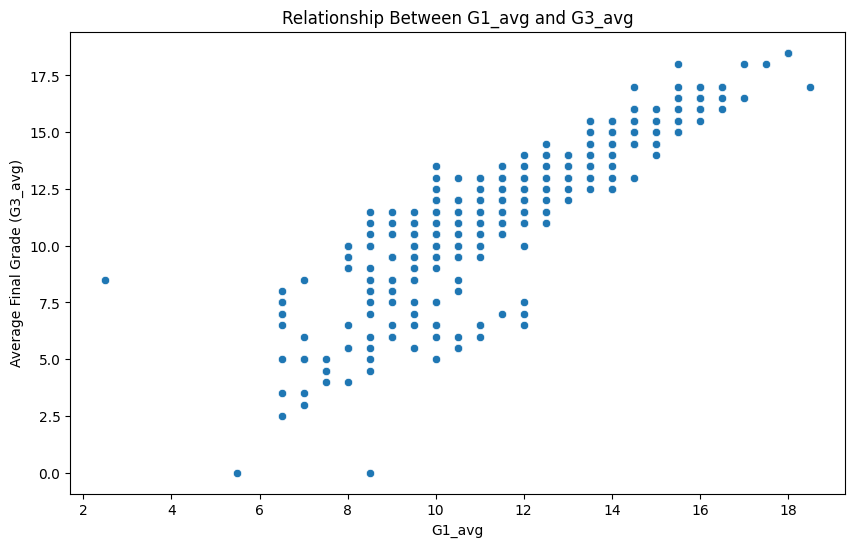

<Figure size 640x480 with 0 Axes>

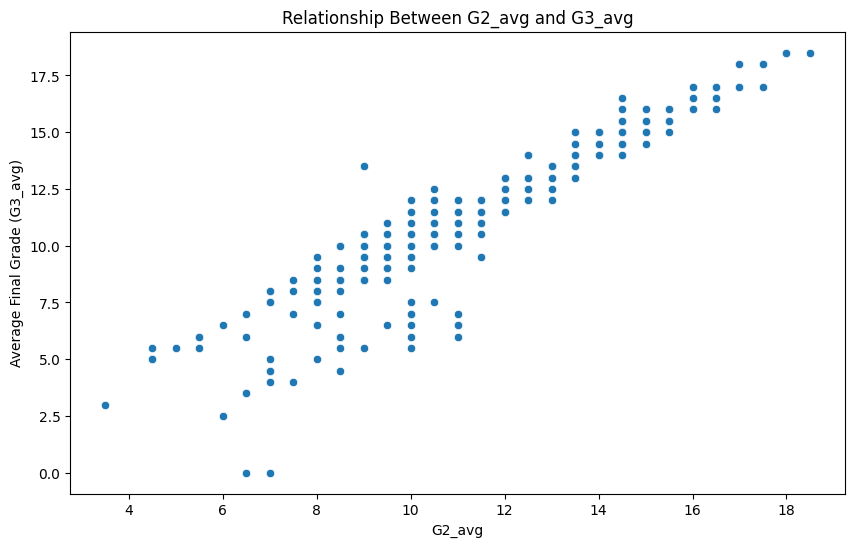

<Figure size 640x480 with 0 Axes>

In [13]:
# Consider the inclusion/exclusion of G1 and G2 (high correlation with G3)
for col in ['G1_avg', 'G2_avg']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=merged_df[col], y=merged_df['G3_avg'])
    plt.title(f"Relationship Between {col} and G3_avg")
    plt.xlabel(col)
    plt.ylabel("Average Final Grade (G3_avg)")
    plt.show()
    plt.savefig(f'../visualisations/{col}_G3_avg_scatter.png', format='png')

In [14]:
# Define columns to exclude
exclude_columns = ['G1_avg', 'G2_avg', 'G3_avg']

# Get all other column names
features_columns = [col for col in merged_df.columns if col not in exclude_columns]

# Feature selection: Exploring inclusion and exclusion of G1 and G2
features_with_g1_g2 = ['G1_avg', 'G2_avg'] + features_columns
features_without_g1_g2 = features_columns

# Create datasets with and without G1, G2
X_with_g1_g2 = merged_df[features_with_g1_g2]
X_without_g1_g2 = merged_df[features_without_g1_g2]
y = merged_df['G3_avg']

### Train-test split data

In [15]:
# One-hot encoding for categorical variables
X_with_g1_g2 = pd.get_dummies(X_with_g1_g2, drop_first=True)
X_without_g1_g2 = pd.get_dummies(X_without_g1_g2, drop_first=True)

# Train-test split for both datasets
X_train_g1_g2, X_test_g1_g2, y_train, y_test = train_test_split(X_with_g1_g2, y, test_size=0.2, random_state=42)
X_train_no_g1_g2, X_test_no_g1_g2, _, _ = train_test_split(X_without_g1_g2, y, test_size=0.2, random_state=42)

### Cross-validate models

In [16]:
# Initialise models
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(random_state=42)
linear_reg = LinearRegression()

In [17]:
# Perform cross-validation
dt_scores = cross_val_score(tree_reg, X_without_g1_g2, y, cv=5, scoring='neg_mean_squared_error')
rf_scores = cross_val_score(forest_reg, X_without_g1_g2, y, cv=5, scoring='neg_mean_squared_error')
lr_scores = cross_val_score(linear_reg, X_without_g1_g2, y, cv=5, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print("Excluding G1 and G2 as Features:")
print("Decision Tree Cross-Validation Scores:", dt_scores)
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Linear Regression Cross-Validation Scores:", lr_scores)

# Calculate the mean and standard deviation of the cross-validation scores
print("\nDecision Tree Mean MSE:", dt_scores.mean(), "Standard Deviation:", dt_scores.std())
print("Random Forest Mean MSE:", rf_scores.mean(), "Standard Deviation:", rf_scores.std())
print("Linear Regression Mean MSE:", lr_scores.mean(), "Standard Deviation:", lr_scores.std())

Excluding G1 and G2 as Features:
Decision Tree Cross-Validation Scores: [-13.39285714 -12.89285714 -16.84868421 -23.19736842 -23.26315789]
Random Forest Cross-Validation Scores: [ -5.04967825 -10.01567143  -8.53323059  -9.86325362 -13.19283125]
Linear Regression Cross-Validation Scores: [ -5.56529408 -11.66167906  -7.91390667  -8.83277803 -16.22172641]

Decision Tree Mean MSE: -17.918984962406018 Standard Deviation: 4.545654053356531
Random Forest Mean MSE: -9.330933027170198 Standard Deviation: 2.631803998912939
Linear Regression Mean MSE: -10.039076853107057 Standard Deviation: 3.6563432803824045


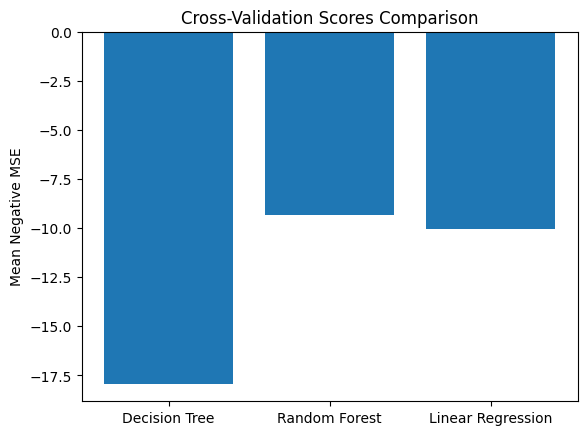

<Figure size 640x480 with 0 Axes>

In [18]:
# Plot cross-validation scores for different models
models = ['Decision Tree', 'Random Forest', 'Linear Regression']
scores = [dt_scores.mean(), rf_scores.mean(), lr_scores.mean()]

plt.bar(models, scores)
plt.ylabel('Mean Negative MSE')
plt.title('Cross-Validation Scores Comparison')
plt.show()
plt.savefig('../visualisations/cross_validation.png', format='png')

### Evaluate models

In [19]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}\n")
    return model, mse, r2

In [20]:
# Evaluate models on both datasets
print("Using G1 and G2 as Features:")
evaluate_model(forest_reg, X_train_g1_g2, X_test_g1_g2, y_train, y_test, "Random Forest Regressor")
evaluate_model(linear_reg, X_train_g1_g2, X_test_g1_g2, y_train, y_test, "Linear Regression")

Using G1 and G2 as Features:
Random Forest Regressor:
Mean Squared Error: 1.3672
R2 Score: 0.8815

Linear Regression:
Mean Squared Error: 2.2615
R2 Score: 0.8040



(LinearRegression(), 2.2614542638493846, 0.8039742349362134)

In [21]:
print("Excluding G1 and G2 as Features:")
evaluate_model(forest_reg, X_train_no_g1_g2, X_test_no_g1_g2, y_train, y_test, "Random Forest Regressor")
evaluate_model(linear_reg, X_train_no_g1_g2, X_test_no_g1_g2, y_train, y_test, "Linear Regression")

Excluding G1 and G2 as Features:
Random Forest Regressor:
Mean Squared Error: 7.5308
R2 Score: 0.3472

Linear Regression:
Mean Squared Error: 12.6722
R2 Score: -0.0984



(LinearRegression(), 12.672182638693336, -0.09844109451480665)

## Feature Importance (using Random Forest)

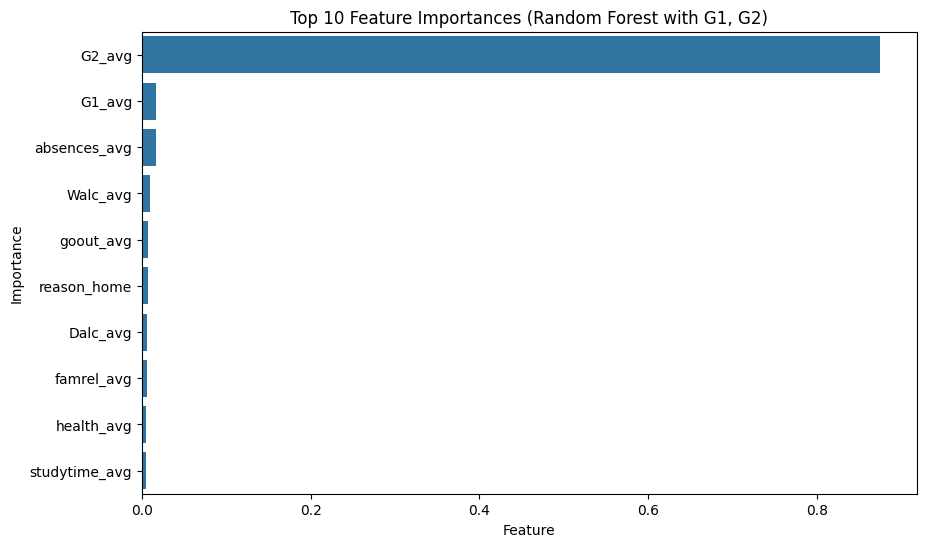

In [22]:
# Feature importance for Random Forest (with G1, G2)
forest_reg.fit(X_train_g1_g2, y_train)
importances = pd.Series(forest_reg.feature_importances_, index=X_with_g1_g2.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Feature Importances (Random Forest with G1, G2)")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.savefig('../visualisations/feature_importance_g1_g2.png', format='png')
plt.show()

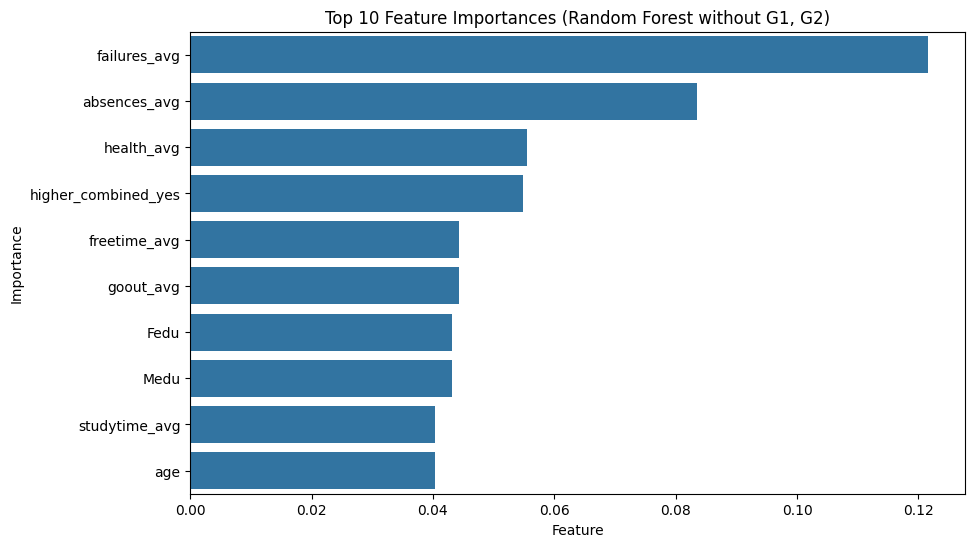

In [23]:
# Feature importance for Random Forest (without G1, G2)
forest_reg.fit(X_train_no_g1_g2, y_train)
importances = pd.Series(forest_reg.feature_importances_, index=X_without_g1_g2.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Feature Importances (Random Forest without G1, G2)")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.savefig('../visualisations/feature_importance_no_g1_g2.png', format='png')
plt.show()